# Assignment-04
## < Linear Regression with Multiple Variables >
#### - 20154521 Seokjun Choi

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

1. Data
    - The training data set.
    - The testing fata set.

In [2]:
path_train = "data_train.csv"
data_train = np.genfromtxt(path_train, delimiter='"', usecols = (1,3,5,7))

x_train = data_train[:, 0]
y_train = data_train[:, 1]
z_train = data_train[:, 2]
h_train = data_train[:, 3]

m_train = len(x_train)

In [3]:
path_test = "data_test.csv"
data_test = np.genfromtxt(path_test, delimiter='"', usecols = (1,3,5,7))

x_test = data_test[:, 0]
y_test = data_test[:, 1]
z_test = data_test[:, 2]
h_test = data_test[:, 3]

m_test = len(x_test)

2. Objective function
    - Use sympy library to formulate the objective function $J(\theta_0, \theta_1, \theta_2, \theta_3) = \frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1 x_i + \theta_2 y_i + \theta_3 z_i - h_i)^2$.
    - Take the partial derivatives with respect to $\theta_0$, $\theta_1$, $\theta_2$, and $\theta_3$.
    - The training data set is used to formulate the objective function<br>

In [4]:
from sympy import symbols, diff

theta_0 = symbols('theta_0')
theta_1 = symbols('theta_1')
theta_2 = symbols('theta_2')
theta_3 = symbols('theta_3')

sum = 0
for i in range(m_train):
    sum += (theta_0 + theta_1 * x_train[i] + theta_2 * y_train[i]
           + theta_3 * z_train[i] - h_train[i])**2
j_func = sum /(2 * m_train)

partial_0 = diff(j_func, theta_0)
partial_1 = diff(j_func, theta_1)
partial_2 = diff(j_func, theta_2)
partial_3 = diff(j_func, theta_3)

- Formulate another energy function from testing data set to plot the testing error later.

In [5]:
sum_test = 0
for i in range(m_test):
    sum_test += (theta_0 + theta_1 * x_test[i] + theta_2 * y_test[i]
           + theta_3 * z_test[i] - h_test[i])**2
j_func_test = sum /(2 * m_test)

3. Set the parameters
    - Set $\theta_0 = -1, \theta_1 = -1$, $\theta_2 = -1, \theta_3 = -1$ before we do linear regression.
    - The learning rate $\alpha$ is 0.00002

In [6]:
learning_rate = 0.00002

tmp_theta_0 = 1
tmp_theta_1 = 1
tmp_theta_2 = 1
tmp_theta_3 = 1
list_theta_0 = list()
list_theta_1 = list()
list_theta_2 = list()
list_theta_3 = list()

t = 1
iteration = list()

tmp_j_value = 0
j_value = list()
tmp_j_value_test = 0
j_value_test = list()

4. Gradient descent
    - Renew the parameters$(\theta_0, \theta_1, \theta_2, \theta_3)$ until the cost converge.
    - $temp 0 := \theta_0 - \alpha \frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1, \theta_2, \theta_3)$<br>
    $temp 1 := \theta_1 - \alpha \frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1, \theta_2, \theta_3)$<br>
    $temp 2 := \theta_2 - \alpha \frac{\partial}{\partial\theta_2}J(\theta_0, \theta_1, \theta_2, \theta_3)$<br>
    $temp 3 := \theta_3 - \alpha \frac{\partial}{\partial\theta_3}J(\theta_0, \theta_1, \theta_2, \theta_3)$<br>
    $\theta_0 := temp 0$<br>
    $\theta_1 := temp 1$<br>
    $\theta_2 := temp 2$<br>
    $\theta_3 := temp 3$<br>
    - Store values in lists to draw graph later.

In [7]:
while True:
    if t > 1 and abs(tmp_j_value - j_func.evalf(subs = {theta_0: tmp_theta_0,
                                                   theta_1: tmp_theta_1,
                                                   theta_2: tmp_theta_2,
                                                   theta_3: tmp_theta_3})) <= 0.001:
        #print(finish)
        break
    tmp_j_value = j_func.evalf(subs = {theta_0: tmp_theta_0,
                                       theta_1: tmp_theta_1,
                                       theta_2: tmp_theta_2,
                                       theta_3: tmp_theta_3})
    
    j_value.append(tmp_j_value)
    iteration.append(t)
    
    
    tmp_j_value_test = j_func_test.evalf(subs = {theta_0: tmp_theta_0,
                                                 theta_1: tmp_theta_1,
                                                 theta_2: tmp_theta_2,
                                                 theta_3: tmp_theta_3})
    j_value_test.append(tmp_j_value_test)
    
    #print(t, tmp_j_value, '\n')
    t += 1
    
    list_theta_0.append(tmp_theta_0)
    list_theta_1.append(tmp_theta_1)
    list_theta_2.append(tmp_theta_2)
    list_theta_3.append(tmp_theta_3)
    temp0 = tmp_theta_0 - learning_rate * partial_0.evalf(subs = {theta_0: tmp_theta_0,
                                                                  theta_1: tmp_theta_1,
                                                                  theta_2: tmp_theta_2,
                                                                  theta_3: tmp_theta_3})
    temp1 = tmp_theta_1 - learning_rate * partial_1.evalf(subs = {theta_0: tmp_theta_0,
                                                                  theta_1: tmp_theta_1,
                                                                  theta_2: tmp_theta_2,
                                                                  theta_3: tmp_theta_3})
    temp2 = tmp_theta_2 - learning_rate * partial_2.evalf(subs = {theta_0: tmp_theta_0,
                                                                  theta_1: tmp_theta_1,
                                                                  theta_2: tmp_theta_2,
                                                                  theta_3: tmp_theta_3})
    temp3 = tmp_theta_3 - learning_rate * partial_3.evalf(subs = {theta_0: tmp_theta_0,
                                                                  theta_1: tmp_theta_1,
                                                                  theta_2: tmp_theta_2,
                                                                  theta_3: tmp_theta_3})
    tmp_theta_0 = temp0
    tmp_theta_1 = temp1
    tmp_theta_2 = temp2
    tmp_theta_3 = temp3
    #print(tmp_theta_0, tmp_theta_1, tmp_theta_2, tmp_theta_3, '\n')
    

5. Plot the estimated parameters using the training dataset

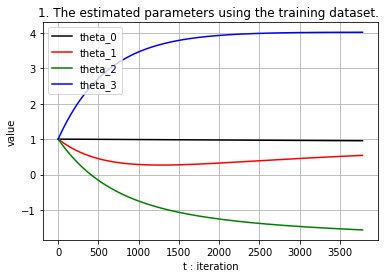

In [8]:
plt.plot(iteration, list_theta_0, c = 'black')
plt.plot(iteration, list_theta_1, c = 'red')
plt.plot(iteration, list_theta_2, c = 'green')
plt.plot(iteration, list_theta_3, c = 'blue')
plt.xlabel('t : iteration')
plt.ylabel('value')
plt.title('1. The estimated parameters using the training dataset. ')
plt.legend(['theta_0', 'theta_1', 'theta_2', 'theta_3'])
plt.grid()
plt.show()

6. Plot the training error

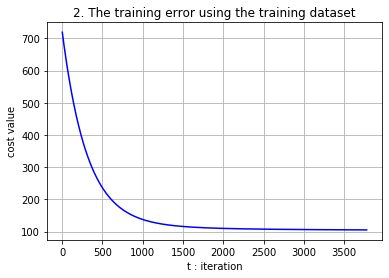

In [9]:
plt.plot(iteration, j_value, c = 'blue')
plt.xlabel('t : iteration')
plt.ylabel('cost value')
plt.title('2. The training error using the training dataset')
plt.grid()
plt.show()

7. Plot the testing error

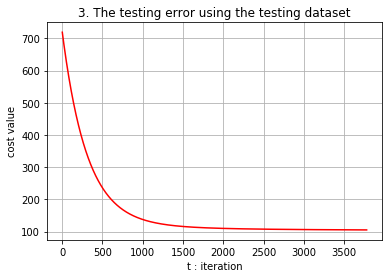

In [10]:
plt.plot(iteration, j_value_test, c = 'red')
plt.xlabel('t : iteration')
plt.ylabel('cost value')
plt.title('3. The testing error using the testing dataset')
plt.grid()
plt.show()

8. Extra
    - We can get the best parameters by using normal equation.
    - $\theta = (X^T X)^{-1} X^T y$

In [11]:
parameters = data_train[:,0:3]
X = np.ones((300,1))
X = np.concatenate((X,parameters), axis = 1)

Y = data_train[:,3]

X_transpose = X.T
best_params = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)

best_params

array([-1.19220481,  0.79285367, -1.7943636 ,  4.00796887])